/root/anaconda3/envs/python3.7/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'boxes': tensor([[247.5370, 209.2034, 298.3054, 392.1898],
        [ 25.8955, 225.7560,  54.7017, 282.1712],
        [  8.2584, 187.5322,  21.1692, 217.0678],
        [327.5682, 213.0459, 404.1044, 244.5451],
        [ 11.1204, 265.4818, 304.8637, 322.2021],
        [175.7617, 220.0182, 237.4467, 243.8628],
        [ 42.5766, 184.0305,  56.7706, 215.3009],
        [  4.3378, 187.7357,  16.5128, 217.5214],
        [382.4699, 217.2499, 390.0151, 237.5881],
        [217.6201, 208.2668, 235.5574, 231.3859],
        [220.2143, 210.1564, 232.2300, 223.2844],
        [180.0901, 198.7412, 374.5576, 249.2974],
        [ 51.5929, 185.7858,  67.7535, 214.2729],
        [381.0409, 215.9133, 396.3386, 237.9669],
        [217.7068, 211.7428, 226.5517, 223.5114],
        [ 88.5335, 213.4517, 236.4733, 242.5669],
        [  9.2962, 260.2574, 357.6241, 393.5838],
        [346.8437, 220.6190, 355.5654, 233.7470],
        [229.3720, 194.4671, 340.6998, 238.8884],
        [  3.4868, 188.6036,  10.9647, 2

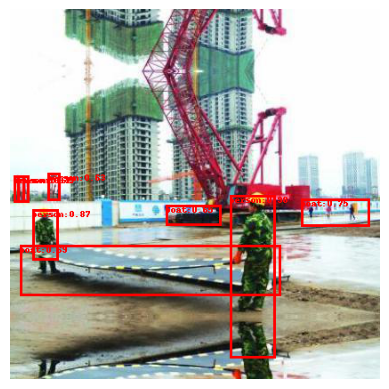

In [1]:
import torch
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# 1. Setup Model
# Load a pre-trained Faster R-CNN model
num_classes = 91  # COCO has 91 classes (including background)
weights = models.detection.FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(weights=weights)
for param in model.backbone.parameters():
    param.requires_grad = False

# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
# Set the model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 2. Image Preprocessing Function
def preprocess_image(image_path):
    """Loads and preprocesses the image for Faster R-CNN."""
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)  # Convert to tensor
    normalize = weights.transforms()
    return image, normalize(image_tensor.unsqueeze(0))  # Add batch dimension

# 3. Visualization Function
def visualize_predictions(image, predictions, threshold=0.3):
    """Draws bounding boxes, labels, and scores on the image."""
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for box, score, label in zip(predictions['boxes'], predictions['scores'], predictions['labels']):
        if score >= threshold:
            box = [int(coord) for coord in box]
            label_name = COCO_CLASSES[label]
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1]), f"{label_name}:{score:.2f}", fill="red", font=font)
    return image

# 4. Load an Example Image
image_path = "1.jpg"  # Replace with your image path
if not os.path.exists(image_path):
    raise FileNotFoundError("Image not found. Please provide a valid image path.")

image, image_tensor = preprocess_image(image_path)

# 5. Perform Inference
with torch.no_grad():
    predictions = model(image_tensor.to(device))[0]

print(predictions)
# Convert predictions to CPU for visualization
predictions = {k: v.cpu() for k, v in predictions.items()}

# 6. Visualize Results
result_image = visualize_predictions(image, predictions, threshold=0.5)

# Show the result
plt.imshow(result_image)
plt.axis("off")
plt.show()

In [6]:
import torch

# Sample data
targets = ({
    'boxes': torch.tensor([[29.0625, 130.3750, 37.2812, 150.2500],
                           [100.8125, 44.7812, 105.5625, 51.9375],
                           [90.1250, 51.0000, 92.7500, 56.3125],
                           [20.3125, 154.2500, 27.4844, 168.0000],
                           [102.3750, 58.7812, 105.7500, 61.9062],
                           [20.6562, 143.1250, 50.2500, 210.8750],
                           [121.5625, 166.7500, 137.1250, 224.0000],
                           [83.6875, 49.4688, 91.1875, 80.8750],
                           [98.5625, 47.5625, 105.3750, 79.5625],
                           [108.5000, 60.0625, 116.2500, 82.7500],
                           [36.7500, 150.5000, 44.6250, 163.6250]], dtype=torch.float16),
    'labels': torch.tensor([0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 1]),
    'image_id': torch.tensor([69])
},)

outputs = [
    {
        'boxes': torch.tensor([[14.8530, 176.2336, 75.4371, 224.0000],
                               [166.1513, 154.6705, 203.4887, 224.0000],
                               [23.0032, 170.1097, 58.3585, 219.2073],
                               [2.4182, 211.5093, 16.0739, 224.0000],
                               [24.2301, 22.5187, 42.5249, 99.3826],
                               [12.2717, 187.4213, 52.3988, 224.0000],
                               [4.8393, 9.2971, 221.4142, 224.0000],
                               [32.6827, 187.5383, 53.6998, 218.7617],
                               [21.4245, 161.6633, 45.5714, 187.7228],
                               [139.6606, 27.2235, 156.7441, 117.7166],
                               [152.4327, 175.1609, 198.6181, 224.0000],
                               [8.9715, 136.9538, 131.9478, 224.0000],
                               [19.4366, 176.0634, 43.7813, 217.7375],
                               [114.1616, 93.5212, 141.5919, 224.0000],
                               [27.6929, 30.2943, 36.9670, 82.8774],
                               [1.2947, 3.6036, 27.9190, 121.6177],
                               [18.6869, 185.4983, 60.5315, 223.5521],
                               [134.2418, 29.9823, 158.0580, 217.2151]]),
        'labels': torch.tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3]),
        'scores': torch.tensor([0.3193, 0.2536, 0.2418, 0.1295, 0.1288, 0.1141, 0.1037, 0.0979, 0.0950, 0.0871, 0.0807, 0.0769, 0.0762, 0.0713, 0.0674, 0.0669, 0.0658, 0.0522])
    }
]

print("Outputs before conversion:", outputs)

# Convert boxes from [x_min, y_min, x_max, y_max] to [x_min, y_min, width, height]
for output in outputs:
    boxes = output['boxes']
    output['boxes'] = torch.stack([boxes[:, 0], boxes[:, 1], boxes[:, 2] - boxes[:, 0], boxes[:, 3] - boxes[:, 1]], dim=1)
    # Convert tensors to native types
    output['boxes'] = output['boxes'].tolist()
    output['labels'] = output['labels'].tolist()
    output['scores'] = output['scores'].tolist()

# Create 'res' list in COCO format
res = [
    {
        "image_id": target["image_id"].item(),
        "category_id": label,
        "bbox": bbox,
        "score": score
    }
    for target, output in zip(targets, outputs)
    for bbox, label, score in zip(output['boxes'], output['labels'], output['scores'])
]

print("Outputs after conversion:", res)

Outputs before conversion: [{'boxes': tensor([[ 14.8530, 176.2336,  75.4371, 224.0000],
        [166.1513, 154.6705, 203.4887, 224.0000],
        [ 23.0032, 170.1097,  58.3585, 219.2073],
        [  2.4182, 211.5093,  16.0739, 224.0000],
        [ 24.2301,  22.5187,  42.5249,  99.3826],
        [ 12.2717, 187.4213,  52.3988, 224.0000],
        [  4.8393,   9.2971, 221.4142, 224.0000],
        [ 32.6827, 187.5383,  53.6998, 218.7617],
        [ 21.4245, 161.6633,  45.5714, 187.7228],
        [139.6606,  27.2235, 156.7441, 117.7166],
        [152.4327, 175.1609, 198.6181, 224.0000],
        [  8.9715, 136.9538, 131.9478, 224.0000],
        [ 19.4366, 176.0634,  43.7813, 217.7375],
        [114.1616,  93.5212, 141.5919, 224.0000],
        [ 27.6929,  30.2943,  36.9670,  82.8774],
        [  1.2947,   3.6036,  27.9190, 121.6177],
        [ 18.6869, 185.4983,  60.5315, 223.5521],
        [134.2418,  29.9823, 158.0580, 217.2151]]), 'labels': tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [4]:
import torch

# Sample data
targets = ({
    'boxes': torch.tensor([[29.0625, 130.3750, 37.2812, 150.2500],
                           [100.8125, 44.7812, 105.5625, 51.9375],
                           [90.1250, 51.0000, 92.7500, 56.3125],
                           [20.3125, 154.2500, 27.4844, 168.0000],
                           [102.3750, 58.7812, 105.7500, 61.9062],
                           [20.6562, 143.1250, 50.2500, 210.8750],
                           [121.5625, 166.7500, 137.1250, 224.0000],
                           [83.6875, 49.4688, 91.1875, 80.8750],
                           [98.5625, 47.5625, 105.3750, 79.5625],
                           [108.5000, 60.0625, 116.2500, 82.7500],
                           [36.7500, 150.5000, 44.6250, 163.6250]], dtype=torch.float16),
    'labels': torch.tensor([0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 1]),
    'image_id': torch.tensor([69])
},)

outputs = [
    {
        'boxes': torch.tensor([[14.8530, 176.2336, 75.4371, 224.0000],
                               [166.1513, 154.6705, 203.4887, 224.0000],
                               [23.0032, 170.1097, 58.3585, 219.2073],
                               [2.4182, 211.5093, 16.0739, 224.0000],
                               [24.2301, 22.5187, 42.5249, 99.3826],
                               [12.2717, 187.4213, 52.3988, 224.0000],
                               [4.8393, 9.2971, 221.4142, 224.0000],
                               [32.6827, 187.5383, 53.6998, 218.7617],
                               [21.4245, 161.6633, 45.5714, 187.7228],
                               [139.6606, 27.2235, 156.7441, 117.7166],
                               [152.4327, 175.1609, 198.6181, 224.0000],
                               [8.9715, 136.9538, 131.9478, 224.0000],
                               [19.4366, 176.0634, 43.7813, 217.7375],
                               [114.1616, 93.5212, 141.5919, 224.0000],
                               [27.6929, 30.2943, 36.9670, 82.8774],
                               [1.2947, 3.6036, 27.9190, 121.6177],
                               [18.6869, 185.4983, 60.5315, 223.5521],
                               [134.2418, 29.9823, 158.0580, 217.2151]]),
        'labels': torch.tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3]),
        'scores': torch.tensor([0.3193, 0.2536, 0.2418, 0.1295, 0.1288, 0.1141, 0.1037, 0.0979, 0.0950, 0.0871, 0.0807, 0.0769, 0.0762, 0.0713, 0.0674, 0.0669, 0.0658, 0.0522])
    }
]

print("Outputs before conversion:", outputs)

# Convert boxes from [x_min, y_min, x_max, y_max] to [x_min, y_min, width, height]
for output in outputs:
    boxes = output['boxes']
    # Calculate width and height
    widths = boxes[:, 2] - boxes[:, 0]
    heights = boxes[:, 3] - boxes[:, 1]
    # Stack [x_min, y_min, width, height] into a new tensor
    output['boxes'] = torch.stack([boxes[:, 0], boxes[:, 1], widths, heights], dim=1)

# Create 'res' list in the specified format
res = [{
    "image_id": target["image_id"].item(),
    "boxes": output["boxes"],
    "labels": output["labels"],
    "scores": output["scores"]
} for target, output in zip(targets, outputs)]

print("Outputs after conversion:", res)

Outputs before conversion: [{'boxes': tensor([[ 14.8530, 176.2336,  75.4371, 224.0000],
        [166.1513, 154.6705, 203.4887, 224.0000],
        [ 23.0032, 170.1097,  58.3585, 219.2073],
        [  2.4182, 211.5093,  16.0739, 224.0000],
        [ 24.2301,  22.5187,  42.5249,  99.3826],
        [ 12.2717, 187.4213,  52.3988, 224.0000],
        [  4.8393,   9.2971, 221.4142, 224.0000],
        [ 32.6827, 187.5383,  53.6998, 218.7617],
        [ 21.4245, 161.6633,  45.5714, 187.7228],
        [139.6606,  27.2235, 156.7441, 117.7166],
        [152.4327, 175.1609, 198.6181, 224.0000],
        [  8.9715, 136.9538, 131.9478, 224.0000],
        [ 19.4366, 176.0634,  43.7813, 217.7375],
        [114.1616,  93.5212, 141.5919, 224.0000],
        [ 27.6929,  30.2943,  36.9670,  82.8774],
        [  1.2947,   3.6036,  27.9190, 121.6177],
        [ 18.6869, 185.4983,  60.5315, 223.5521],
        [134.2418,  29.9823, 158.0580, 217.2151]]), 'labels': tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 